# Exercise 2
*CS-E5885 Modeling Biological Networks* <br>
*18th Jan, 2023* <br>

<hr>

In [2]:
# Import packages
import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

## 0. Generating random numbers (0 p)


**a)** This is how you can generate random real numbers from a normal distribution and plot their histogram.

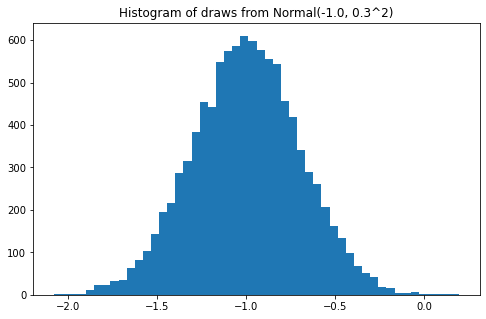

In [3]:
N = 10000 # number of draws
scale_example = 0.3
loc_example = - 1.0
draws_a = np.random.normal(loc = loc_example, scale = scale_example, size = N) # loc = mean, scale = stdev

plt.figure(figsize = (8,5))
plt.hist(draws_a, bins = 50)
plt.title('Histogram of draws from Normal(%.1f, %.1f^2)' % (loc_example, scale_example))
plt.show()

**b)** This is how you can generate random non-negative integers from a Poisson distribution.

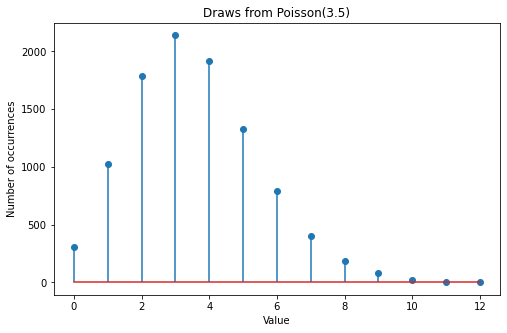

In [4]:
lam_example = 3.5
draws_b = np.random.poisson(lam=lam_example, size=N) # lam = rate
values, counts = np.unique(draws_b, return_counts=True) # count occurrence of each integer

plt.figure(figsize = (8,5))
plt.stem(values, counts)
plt.title('Draws from Poisson(%.1f)' % lam_example)
plt.xlabel('Value')
plt.ylabel('Number of occurrences')
plt.show()

**c)** This is how you can randomly pick items from a set of choices \{"apple", "pear", "banana"\} with replacement, so that

\begin{align*}
\text{Pr("apple")} &= 0.5 \\
\text{Pr("pear"}) &= 0.2 \\
\text{Pr("banana")} &= 0.3 \\
\end{align*}

In [5]:
items = ["apple", "pear", "banana"]
probabilities = np.array([0.5, 0.2, 0.3])
draws_c = np.random.choice(items, size = 20, p = probabilities, replace = True)
print(draws_c)

['apple' 'apple' 'pear' 'apple' 'banana' 'banana' 'banana' 'banana'
 'banana' 'apple' 'pear' 'apple' 'apple' 'banana' 'banana' 'apple' 'apple'
 'pear' 'apple' 'apple']


## 1. Poisson processes (2 p)
Suppose that reaction A occurs according to a homogeneous Poisson process
with a rate of 5 per second and reaction B according to a homogeneous Poisson process with a rate of
2.5 per second, and these processes are independent.

**a)** Let $X$ be the number of times reaction A has occurred after 4 seconds. What is the distribution of the random variable $X$? 

**b)** Let $Y$ be the waiting time until the reaction A occurs for the first time. What is the distiribution of the random variable $Y$?

**c)** Let $Z$ be the waiting time until either reaction A or B occurs for the first time. What is the distiribution of the random variable $Z$?

**d)** For each random variable $X$, $Y$, and $Z$: draw $10^4$ realizations from its distribution. If the random variable is continuous, plot a histogram of the draws with 50 bins like in **0 a)**. If it is discrete, plot the number of times each value was drawn, like in **0 b)**.

**Hint:** Answers to the "What is the distribution of..." questions are generally known probability distributions, so in your answer it is enough to write the name of the distribution and its parameter values. So no need to write the density function.

a) X ~ Poisson(5*4)

b) Y ~ Exponential(5) 

c) Z ~ Exponential(5+2.5)

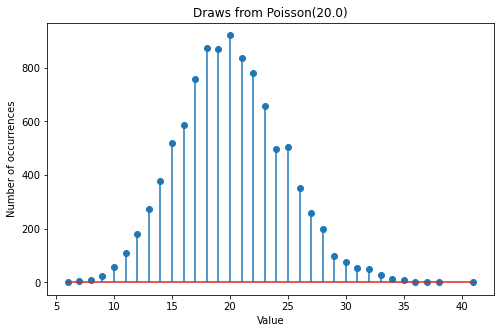

In [6]:
# d)

# X ~ Poisson(5*4)
lam = 5*4
draws_1 = np.random.poisson(lam=lam, size=10000) 
values, counts = np.unique(draws_1, return_counts=True)

plt.figure(figsize = (8,5))
plt.stem(values, counts)
plt.title('Draws from Poisson(%.1f)' % lam)
plt.xlabel('Value')
plt.ylabel('Number of occurrences')
plt.show()

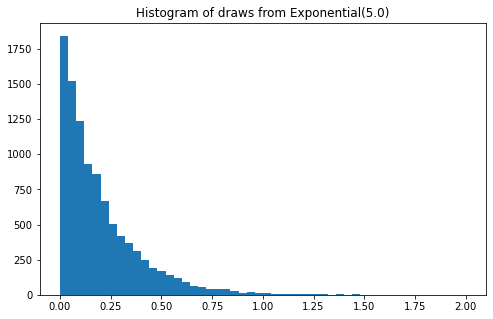

In [7]:
# Y ~ Exponential(5) 
lam = 5
draws_2 = np.random.exponential(scale=1/lam, size=10000) 

plt.figure(figsize = (8,5))
plt.hist(draws_2, bins = 50)
plt.title('Histogram of draws from Exponential(%.1f)' % lam)
plt.show()

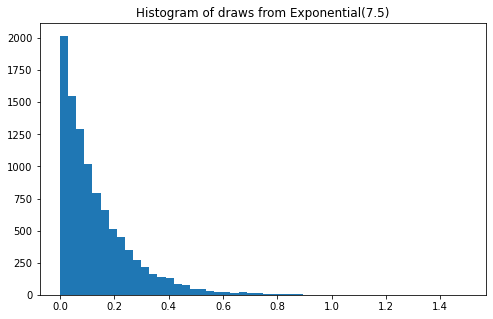

In [8]:
# Z ~ Exponential(5+2.5)
lam = 5+2.5
draws_3 = np.random.exponential(scale=1/lam, size=10000) 

plt.figure(figsize = (8,5))
plt.hist(draws_3, bins = 50)
plt.title('Histogram of draws from Exponential(%.1f)' % lam)
plt.show()

## 2. Stochastic simulation using the Gillespie algorithm (4 p)

Read about the Gillespie algorithm in the Lecture 3 slides or Wilkinson book. Consider again the Lotka-Volterra system

$$
\begin{align*}
A &\longrightarrow 2 A &&\text{Species A reproduction}\\
A + B &\longrightarrow 2 B &&\text{Species B feeds on species A} \\
B &\longrightarrow \emptyset &&\text{Species B dies}
\end{align*}
$$

Your task is to simulate realizations of the Lotka-Volterra system on the time interval $[0, 50]$ using the Gillespie algorithm. Use the stochastic rate constants $c$ given in the below table, and an initial state of 80 molecules of A and 150 molecules of B.

| Reaction            | Stochastic rate constant |
|---------------------|--------------------------|
| $A$ $\rightarrow$ $2A$  | 1.0                      |
| $A + B$ $\rightarrow$ $2B$  | 0.01                  |
| $B$ $\rightarrow$ $\emptyset$   | 0.7                      |

**a)** Write the hazard function for each reaction (use notation $\textbf{x} = [x_1, x_2]$, where $x_1$ corresponds to $A$ and $x_2$ corresponds to $B$).

**b)** Implement the Gillespie algorithm using the code template below. Remember that in Python arrays start from zero so for example the first row of a 2-dimensional array called `arr` is `arr[0,:]`.


a)

Reaction 1: 
hi(x, ci) = 1.0*x1

Reaction 2:
hi(x, ci) = 0.01*x1*x2

Reaction 3:
hi(x, ci) = 0.7*x2

In [33]:
max_iter = int(1e5)          # maximum number of reactions
T = np.zeros(max_iter)       # store reaction event times in this array
X = np.zeros((max_iter, 2))  # store the state after each reaction as rows of this array
    
# Initialize the system with initial numbers of molecules and initial time
X[0,:] = 80,150
T[0] = 0
max_time = 50

In [34]:
# Main loop
for idx in range(0, max_iter-1):
    
    # Calculate the hazard for each reaction and the combined reaction hazard
    # reaction 1
    h0 = 1.0*X[idx,0]
    #reaction 2
    h1 = 0.01*X[idx,0]*X[idx,1]
    #reaction 3
    h2 = 0.7*X[idx,1]
    #combined hazard
    h_combined = h0+h1+h2
    
    # Draw the next reaction time and store it in T[idx+1]
    T[idx+1] = T[idx]+np.random.exponential(scale=1/h_combined) 
    
    # Determine which reaction happens next
    items = [0, 1, 2]
    probabilities = np.array([h0/h_combined, h1/h_combined, h2/h_combined])
    draw = np.random.choice(items, size = 1, p = probabilities, replace = True)
    
    #Calculate the updated state
    previous_A = X[idx,0]
    previous_B = X[idx,1]
    if draw == 0:
        X[idx+1, :] = previous_A+1, previous_B
        
    if draw == 1:
        X[idx+1, :] = previous_A-1, previous_B+1
        
    if draw == 2:
        X[idx+1, :] = previous_A, previous_B-1
    
    # Stop if extinction of both species happened
    if sum(X[idx+1, :]) == 0:
        print("Extinction at t = {}".format(T[idx+1]))
        X = X[0:(idx+1), :]
        T = T[0:(idx+1)]
        break
        
    # Stop if max time reached
    current_time = T[idx+1]
    if current_time > max_time:
        print("Reached max time.")
        X = X[0:(idx+1), :]
        T = T[0:(idx+1)]
        break
    

Reached max time.


**c)**  Use the `plot_result` function provided below to visualize simulation results. Run the simulation many times in order to get an understanding of the possible dynamics. Include a plot of one realization in your answer.

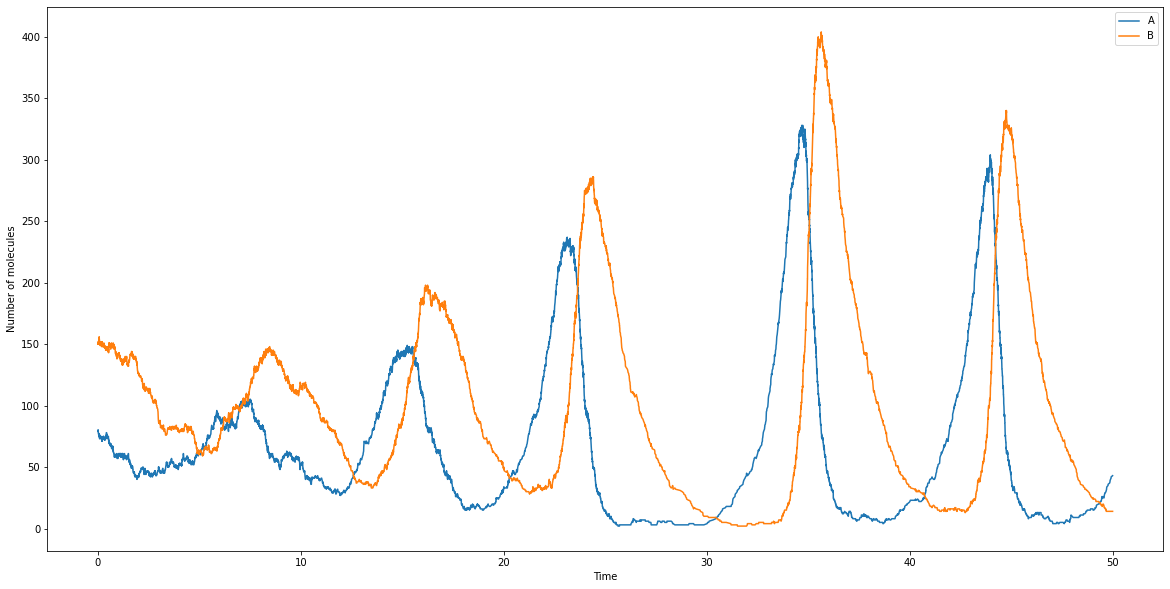

In [36]:
def plot_result(T, X):
    """Visualize a Lotka-Volterra simulation result. 
    
    :param T: 1-dimensional numpy array of reaction times.
    :param X: 2-dimensional numpy array containing the system states after each reaction.
    :return: Nothing.
    """
    plt.figure(figsize = (20,10))
    plt.plot(T, X);
    plt.xlabel('Time');
    plt.ylabel('Number of molecules')
    plt.legend(('A', 'B'));
    plt.show()
    
    
plot_result(T,X)